# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import google.colab

# DATA upload


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/project/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/project/test.csv")

In [4]:
test_df

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


                    MEAN_RR  MEDIAN_RR      SDRR     RMSSD      SDSD  \
MEAN_RR            1.000000   0.960858  0.462681  0.333090  0.332993   
MEDIAN_RR          0.960858   1.000000  0.333355  0.309163  0.309124   
SDRR               0.462681   0.333355  1.000000  0.262261  0.261937   
RMSSD              0.333090   0.309163  0.262261  1.000000  1.000000   
SDSD               0.332993   0.309124  0.261937  1.000000  1.000000   
SDRR_RMSSD         0.332578   0.203296  0.914891 -0.068263 -0.068637   
HR                -0.944644  -0.929620 -0.202389 -0.285130 -0.285122   
pNN25              0.286851   0.270765  0.135833  0.951826  0.951847   
pNN50              0.245344   0.197176  0.472639  0.794806  0.794734   
SD1                0.332993   0.309124  0.261937  1.000000  1.000000   
SD2                0.462376   0.333051  0.999997  0.260257  0.259932   
KURT              -0.292890  -0.284451 -0.095933 -0.178865 -0.178901   
SKEW              -0.197701  -0.317033  0.276902 -0.053912 -0.05

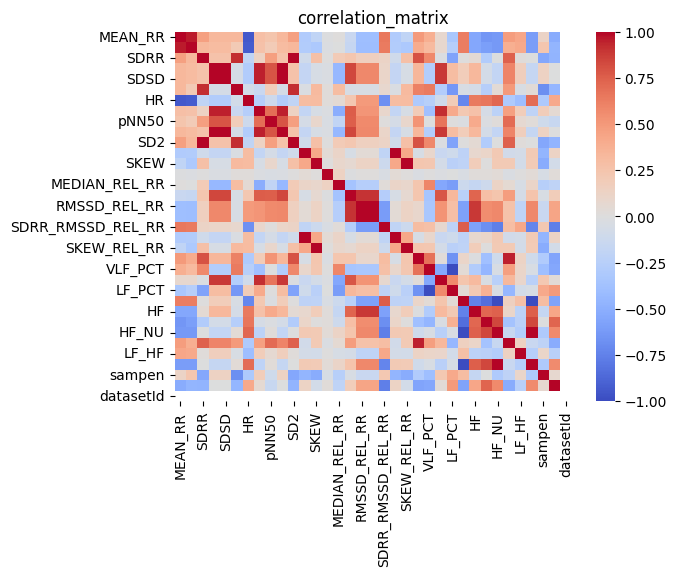

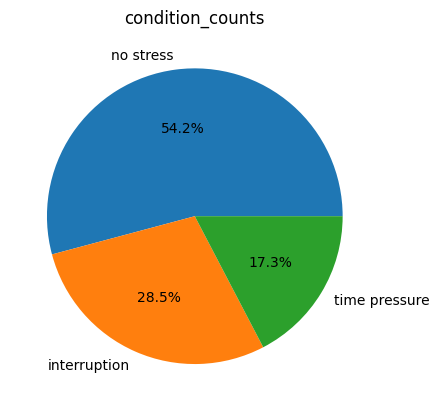

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,160.620124,0.039637,-0.168160,0.000053,-0.000785,0.017038,0.005512,0.005512,3.091047,0.039637,-0.168160,4130.820437,80.985074,969.550262,19.008113,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
410318,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,419.433484,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,0.016151,1.742060,3.644498,1.866897,7163.989622,83.960222,1250.595884,14.656681,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
410319,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,188.620710,0.885293,0.689171,-0.000329,0.000709,0.032607,0.019102,0.019102,1.706976,0.885293,0.689171,3946.374071,64.968893,1911.676588,31.471804,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
410320,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,85.602742,0.005286,-0.040367,-0.000021,-0.000300,0.015049,0.008822,0.008822,1.705789,0.005286,-0.040367,732.516968,54.756129,563.466628,42.119504,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


In [5]:
# from @robertovicario
# https://www.kaggle.com/code/robertovicario/swell-kw-stress-detection#Analyze-Data

#train_df = pd.read_csv("/train.csv")
#test_df = pd.read_csv("/test.csv")
df = pd.concat([train_df, test_df], ignore_index=True)

def analyze_data(df):

    pd.set_option('display.max_columns', None)
    #print(df.describe(include='all'))

    numeric_data = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_data.corr()
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, cmap='coolwarm')
    plt.title('correlation_matrix')
    plt.show()

    condition_counts = df['condition'].value_counts()
    labels = condition_counts.index
    sizes = condition_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('condition_counts')
    plt.show()

analyze_data(df)
df

In [6]:
print(df.columns)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')


In [7]:
max_values = df.max()
min_values = df.min()

# Combine results into one DataFrame
summary = pd.DataFrame({'max': max_values, 'min': min_values})

print(summary)

                             max           min
MEAN_RR              1322.016957    547.483802
MEDIAN_RR             1653.12225    517.293295
SDRR                  563.486949     27.233947
RMSSD                  26.629477      5.529742
SDSD                   26.629392       5.52963
SDRR_RMSSD              54.52395      2.660381
HR                    113.754253     48.736986
pNN25                       39.4           0.0
pNN50                   5.466667           0.0
SD1                    18.836107      3.911344
SD2                   796.852945     38.307745
KURT                   64.088107     -1.894831
SKEW                      6.7778     -2.136278
MEAN_REL_RR             0.001244     -0.001275
MEDIAN_REL_RR           0.002095     -0.004425
SDRR_REL_RR             0.036575      0.008987
RMSSD_REL_RR            0.026955       0.00322
SDSD_REL_RR             0.026955       0.00322
SDRR_RMSSD_REL_RR       3.724134      1.169342
KURT_REL_RR            64.088107     -1.894831
SKEW_REL_RR  

# C. DATA PREPROCESSING


In [8]:
# code to replicate Step 1
X = df.drop(columns=['datasetId', 'condition'])
y = df.condition
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(y.to_numpy().reshape(-1, 1))

In [15]:
# code to replicate Step 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = StandardScaler().fit_transform(X_train).reshape(-1, 1, 34)
X_test = StandardScaler().fit_transform(X_test).reshape(-1, 1, 34)
X_train.shape

(328257, 1, 34)

# CNN MODEL

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Concatenate, Dropout

input_layer = Input(shape=(1, 34))

# Branch 1: small kernel
branch1 = Conv1D(64, kernel_size=2, activation='relu', padding='same')(input_layer)
branch1 = MaxPooling1D(pool_size=1)(branch1)
branch1 = Flatten()(branch1)

# Branch 2: larger kernel
branch2 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(input_layer)
branch2 = MaxPooling1D(pool_size=1)(branch2)
branch2 = Flatten()(branch2)

# Merge both branches
merged = Concatenate()([branch1, branch2])
merged = Dense(64, activation='relu')(merged)
merged = Dropout(0.3)(merged)
output = Dense(3, activation='softmax')(merged)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [26]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,  # number of epochs
                    batch_size=64,  # batch size
                    validation_split=0.05)

Epoch 1/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8445 - loss: 0.3810 - val_accuracy: 0.9946 - val_loss: 0.0249
Epoch 2/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9979 - val_loss: 0.0096
Epoch 3/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9964 - val_loss: 0.0109
Epoch 4/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 5/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9939 - loss: 0.0176 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 6/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9991 - val_loss: 0.0031
Epoch 7/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 8/30
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9958 - loss: 0

# Testing

In [27]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming a multi-class classification problem
y_test_classes = np.argmax(y_test, axis=1)

2565/2565 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


Precision: 0.9999147040950482
Recall: 0.9999147017607993
Accuracy: 0.9999147017607993
F1 Score: 0.9999147004456254
Matthews Correlation Coefficient: 0.9998564226323113
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23362
           1       1.00      1.00      1.00     44597
           2       1.00      1.00      1.00     14106

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



Text(50.722222222222214, 0.5, 'True Labels')

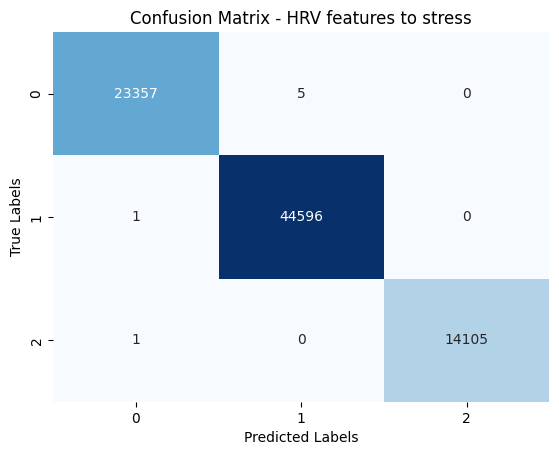

In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels in y_test
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)
cm = confusion_matrix(y_test_classes, y_pred_classes, )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print("Classification Report:\n", report)
plt.title('Confusion Matrix - HRV features to stress')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


In [ ]:
probs = model.predict(X_test)
print(probs)
predicted_class = np.argmax(probs, axis=1)
print(predicted_class)

2565/2565 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[9.9999994e-01 1.2761178e-14 2.1152928e-11]
 [9.9999994e-01 1.6904023e-16 4.0821426e-11]
 [5.1584510e-15 9.9999994e-01 1.1721430e-20]
 ...
 [9.9999994e-01 0.0000000e+00 4.3940595e-18]
 [0.0000000e+00 9.9999994e-01 2.0200974e-34]
 [1.0000000e+00 4.1770315e-28 0.0000000e+00]]
[0 0 1 ... 0 1 0]


In [ ]:
model.save("stress_model.keras")

In [ ]:
from google.colab import files
files.download("stress_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("stress_from_hrv_model.keras")
model.save("stress_from_hrv_model.h5")

import joblib
scalar = StandardScaler()

joblib.dump(scaler, 'stress_from_hrv_scaler.pkl')


from google.colab import files
files.download("stress_from_hrv_model.keras")
files.download("stress_from_hrv_model.h5")
files.download('stress_from_hrv_scaler.pkl')

NameError: name 'scaler' is not defined

In [ ]:
model.save("stress_from_hrv_model.keras")
model.save("stress_from_hrv_model.h5")

import joblib

# Assuming 'scalar' (which holds the fitted StandardScaler) is available from previous cells.
# Make sure you are using the correct variable name 'scalar' in the joblib.dump function.
joblib.dump(scalar, 'stress_from_hrv_scaler.pkl')

from google.colab import files
files.download("stress_from_hrv_model.keras")
files.download("stress_from_hrv_model.h5")
files.download('stress_from_hrv_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>